# Course 2 Project: ML Pipeline for Feature Engineering

## Instructions

In this project, you'll use data related to microeconomic indicators and historical stock prices to explore the data engineering pipline. You'll get to practice:

* Data ingestion 
* Data cleaning
* Data imputation
* Exploratory data analysis (EDA) through charts and graphs

## Packages

You'll use `pandas` and `matplotlib`, which were covered in the course material, to import, clean, and plot data. They have been installed in this workspace for you. If you're working locally and you installed Jupyter using Anaconda, these packages will already be installed. 

In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Load data

The first step in a data engineering pipeline for machine learning is to ingest the data that will be used. For this project, data is hosted on a public GitHub repo. 

### Your tasks
* Import data from the provided [GitHub repo](https://github.com/udacity/CD13649-Project/tree/main/Project) using `pandas`. For your convenience, the data files (CSVs) are also present in the current workspace at the path **CD13649-Project/Project/**. Here are the data files to import: 
  1. GDP (**GDP.csv**)
  2. Inflation (**inflation_monthly.csv**)
  3. Apple stock prices (**apple_historical_data.csv**)
  4. Microsoft stock prices (**microsoft_historical_data.csv**)
  5. Consumer price index (**consumer_price_index.csv**)



* Verify that the data has been imported correctly into `pandas` dataframes. Use methods like `head()` and `info()`


* You may need to change column names to make them easier to work with


* You may need to cast datetime data to the `datetime` format using `pandas` `to_datetime()` method



In [44]:
# Load historical GDP data
GDP_Data = pd.read_csv('https://github.com/udacity/CD13649-Project/blob/634684b2f39a089935f039feab1d33bb789f9603/Project/GDP.csv?raw=true')
Inflation_M_Data = pd.read_csv('https://github.com/udacity/CD13649-Project/blob/main/Project/inflation_monthly.csv?raw=true')
AAPL_Data = pd.read_csv('https://github.com/udacity/CD13649-Project/blob/main/Project/apple_historical_data.csv?raw=true?raw=true')
MS_Data = pd.read_csv('https://github.com/udacity/CD13649-Project/blob/main/Project/microsoft_historical_data.csv?raw=true')
CPI_Data = pd.read_csv('https://github.com/udacity/CD13649-Project/blob/main/Project/consumer_price_index.csv?raw=true')

In [45]:
# Check the first few rows of data
print(GDP_Data.head())
print(Inflation_M_Data.head())
print(AAPL_Data.head())
print(MS_Data.head())
print(MS_Data.head())

         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742
         DATE  CORESTICKM159SFRBATL
0  1968-01-01              3.651861
1  1968-02-01              3.673819
2  1968-03-01              4.142164
3  1968-04-01              4.155828
4  1968-05-01              4.088245
        Date Close/Last     Volume      Open      High       Low
0   5/3/2024   $183.38   163224100  $186.65   $187.00   $182.66 
1   5/2/2024   $173.03    94214920  $172.51   $173.42   $170.89 
2   5/1/2024   $169.30    50383150  $169.58   $172.71   $169.11 
3  4/30/2024   $170.33    65934780  $173.33   $174.99   $170.00 
4  4/29/2024   $173.50    68169420  $173.37   $176.03   $173.10 
         Date Close/Last    Volume     Open       High        Low
0  05/03/2024    $406.66  17446720  $402.28    $407.15    $401.86
1  05/02/2024    $397.84  17709360  $397.66    $399.93  $394.6515
2  05/01/2024    $394.94  23562480  $392.61  $401.7199    

In [46]:
# Load the historical stock price data for Apple and Microsoft


In [47]:
# Check the first few rows of data


In [48]:
# Use methods like .info() and .describe() to explore the data
print(AAPL_Data.info())
print(AAPL_Data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Date        2517 non-null   object
 1   Close/Last  2514 non-null   object
 2   Volume      2517 non-null   int64 
 3   Open        2517 non-null   object
 4   High        2517 non-null   object
 5   Low         2517 non-null   object
dtypes: int64(1), object(5)
memory usage: 118.1+ KB
None
             Volume
count  2.517000e+03
mean   1.277394e+08
std    7.357405e+07
min    2.404834e+07
25%    7.741776e+07
50%    1.077601e+08
75%    1.567789e+08
max    7.576780e+08


## Data preprocessing: Check for missing data and forward fill

Check the Apple historical prices for missing data. Check for missing data in all columns. If there's data missing, use a forward fill to fill in those missing prices. 

In [49]:
# Check for nulls 
print("Null values in the GDP_Data:")
print(GDP_Data.isna().sum())
print("Null values in the Inflation_M_Data:")
print(Inflation_M_Data.isna().sum())
print("Null values in the AAPL_Data:")
print(AAPL_Data.isna().sum())
print("Null values in the MS_Data:")
print(MS_Data.isna().sum())
print("Null values in the CPI_Data:")
print(CPI_Data.isna().sum())

Null values in the GDP_Data:
DATE    0
GDP     0
dtype: int64
Null values in the Inflation_M_Data:
DATE                    0
CORESTICKM159SFRBATL    0
dtype: int64
Null values in the AAPL_Data:
Date          0
Close/Last    3
Volume        0
Open          0
High          0
Low           0
dtype: int64
Null values in the MS_Data:
Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64
Null values in the CPI_Data:
DATE                    0
CORESTICKM159SFRBATL    0
dtype: int64


In [50]:
# Forward fill any missing data
AAPL_Data = AAPL_Data.ffill()

In [51]:
# Check again for nulls after using forward fill
print(AAPL_Data.isna().sum())

Date          0
Close/Last    0
Volume        0
Open          0
High          0
Low           0
dtype: int64


## Data preprocessing: Remove special characters and convert to numeric/datetime

The next step in the data engineering process is to standardize and clean up data. In this step, you'll check for odd formatting and special characters that will make it difficult to work with data as numeric or datetime. 

In this step:
* Create a function that takes in a dataframe and a list of columns and removes dollar signs ('$') from those columns
* Convert any columns with date/time data into a `pandas` `datetime` format

In [52]:
def convert_dollar_columns_to_numeric(df, numeric_columns):
    '''
        Removes dollar signs ('$') from a list of columns in a given dataframe AND casts the columns to a numeric datatype.
        Updates dataframe IN PLACE.
        
        Inputs:
            df: dataframe to be operated on
            numeric_columns: columns that should have numeric data but have dollar signs currently
            
        Returns:
            None - changes to the dataframe can be made in place
    '''
    for col in numeric_columns:
        df[col] = df[col].replace({'\$': ''}, regex=True).astype(float)

    pass 

In [53]:
# Use convert_dollar_columns_to_numeric() to remove the dollar sign from the Apple and Microsoft datasets
dollar_cols = ['Close/Last', 'Open', 'High', 'Low']
convert_dollar_columns_to_numeric(AAPL_Data, dollar_cols)
convert_dollar_columns_to_numeric(MS_Data, dollar_cols)


In [54]:
# Use pandas's to_datetime() to convert any columns that are in a datetime format

MS_Data['Date'] = pd.to_datetime(MS_Data['Date'])
AAPL_Data['Date'] = pd.to_datetime(AAPL_Data['Date'])

In [55]:
# Use .info() and check the type of each column to ensure that the above steps worked
print(MS_Data.info())
print(AAPL_Data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64

## Data preprocessing: Align datetime data

Data engineering includes changing data with a datetime component if needed so that different time series can be more easily compared or plotted against each other. 

In this step:

* Align the inflation date so that it falls on the last day of the month instead of the first

Helpful hints: 
* Use the `pandas` `offsets` method using `MonthEnd(0)` to set the 'Date' column to month-end

In [56]:
# Align inflation data so that the date is the month end (e.g. Jan 31, Feb 28/28)
# Inflation_M_Data = pd.offset()
#Inflation_M_Data.head
Inflation_M_Data['DATE'] = pd.to_datetime(Inflation_M_Data['DATE'])
Inflation_M_Data['DATE'] = Inflation_M_Data['DATE'] + pd.offsets.MonthEnd(0)
Inflation_M_Data.head()

,DATE,CORESTICKM159SFRBATL
0,1968-01-31,3.651861
1,1968-02-29,3.673819
2,1968-03-31,4.142164
3,1968-04-30,4.155828
4,1968-05-31,4.088245


## Data preprocessing: Upsample, downsample and interpolate data

Inflation data is presented monthly in this dataset. However, for some models, you may need it at a quarterly frequency, and for some models you may need it at a quarterly frequency. 

In this step:
* Create a new quarterly inflation dataframe by downsampling the monthly inflation data to quarterly using the mean (e.g. for quarter 1 in a given year, use the average values from January, February, and March)
* Create a new weekly inflation dataframe by upsampling the monthly inflation data. For this, you'll need to use `resample` and then you'll need to `interpolate` to fill in the missing data at the weekly frequency

Note that you may need to change the index for some of these operations! 

In [57]:
# Upsample and interpolate from monthly to weekly 
Inflation_M_Data.info()
Inflation_M_Data.set_index('DATE', inplace=True)
Inflation_Q_Data = Inflation_M_Data.resample('QE').mean()
Inflation_Q_Data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   DATE                  675 non-null    datetime64[ns]
 1   CORESTICKM159SFRBATL  675 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 10.7 KB


,CORESTICKM159SFRBATL
DATE,
1968-03-31,3.822615
1968-06-30,4.263214
1968-09-30,4.882643
1968-12-31,5.429443
1969-03-31,5.873770


In [58]:
# Downsample from monthly to quarterly 

Inflation_W_Data = Inflation_M_Data
Inflation_W_Data = Inflation_W_Data.reset_index()
Inflation_W_Data['DATE'] = pd.to_datetime(Inflation_W_Data['DATE'])
Inflation_W_Data.set_index('DATE', inplace=True)
print(Inflation_W_Data)
Inflation_W_Data = Inflation_M_Data.resample('W').interpolate()
#Inflation_W_Data = Inflation_W_Data.interpolate()
#Inflation_W_Data['CORESTICKM159SFRBATL'] =  Inflation_W_Data['CORESTICKM159SFRBATL'].interpolate()
Inflation_W_Data.head()

            CORESTICKM159SFRBATL
DATE                            
1968-01-31              3.651861
1968-02-29              3.673819
1968-03-31              4.142164
1968-04-30              4.155828
1968-05-31              4.088245
...                          ...
2023-11-30              4.688293
2023-12-31              4.554396
2024-01-31              4.603922
2024-02-29              4.403102
2024-03-31              4.509212

[675 rows x 1 columns]


,CORESTICKM159SFRBATL
DATE,
1968-02-04,NaN
1968-02-11,NaN
1968-02-18,NaN
1968-02-25,NaN
1968-03-03,NaN


## Data preprocessing: Normalize/standardize a feature

Economic time series data often involve variables measured on different scales (e.g., GDP in trillions of dollars, inflation in percentage points). Standardizing these variables (typically by subtracting the mean and dividing by the standard deviation) puts them on a common scale, allowing for meaningful comparisons and analyses.

Your task:
* Standardize the GDP data. You may do this manually by subtracting the mean and dividing by the standard deviation, or you may use a built-in method from a library like `sklearn`'s `StandardScaler`

In [59]:
!pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 25.0.1
[notice] To update, run: pip install --upgrade pip


In [60]:
# Standardize the GDP measure
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
    

In [61]:
# Check the dataframe to make sure the calculation worked as expected 
print(GDP_Data.head())
GDP_Data['DATE'] = pd.to_datetime(GDP_Data['DATE'])
convert_dollar_columns_to_numeric(GDP_Data, ['GDP'])
print(GDP_Data['GDP'])
GDP_Data['GDP'] = scaler.fit_transform(GDP_Data[['GDP']])

print(GDP_Data.head())

         DATE      GDP
0  1947-01-01  243.164
1  1947-04-01  245.968
2  1947-07-01  249.585
3  1947-10-01  259.745
4  1948-01-01  265.742
0        243.164
1        245.968
2        249.585
3        259.745
4        265.742
         ...    
304    26813.601
305    27063.012
306    27610.128
307    27956.998
308    28284.498
Name: GDP, Length: 309, dtype: float64
        DATE       GDP
0 1947-01-01 -0.935496
1 1947-04-01 -0.935121
2 1947-07-01 -0.934636
3 1947-10-01 -0.933276
4 1948-01-01 -0.932472


## EDA: Plotting a time series of adjusted open vs close price

As part of your EDA, you'll frequently want to plot two time series on the same graph and using the same axis to compare their movements. 

Your task:
* Plot the Apple open and close price time series on the same chart **for the last three months only**. Be sure to use a legend to label each line

**NOTE**: This is a large dataset. If you try to plot the entire series, your graph will be hard to interpret and may take a long time to plot. Be sure to use only the most recent three months of data. 

In [62]:
# Get max date in timeseries
MAX_DATE = AAPL_Data['Date'].max()
print(MAX_DATE)

2024-05-03 00:00:00


In [63]:
# Use the max date calculated above to get the last three months of data in the dataset 
three_months_ago = MAX_DATE - pd.DateOffset(months=3)
print(three_months_ago)

2024-02-03 00:00:00


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2517 entries, 0 to 2516
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Date        2517 non-null   datetime64[ns]
 1   Close/Last  2517 non-null   float64       
 2   Volume      2517 non-null   int64         
 3   Open        2517 non-null   float64       
 4   High        2517 non-null   float64       
 5   Low         2517 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 118.1 KB
None


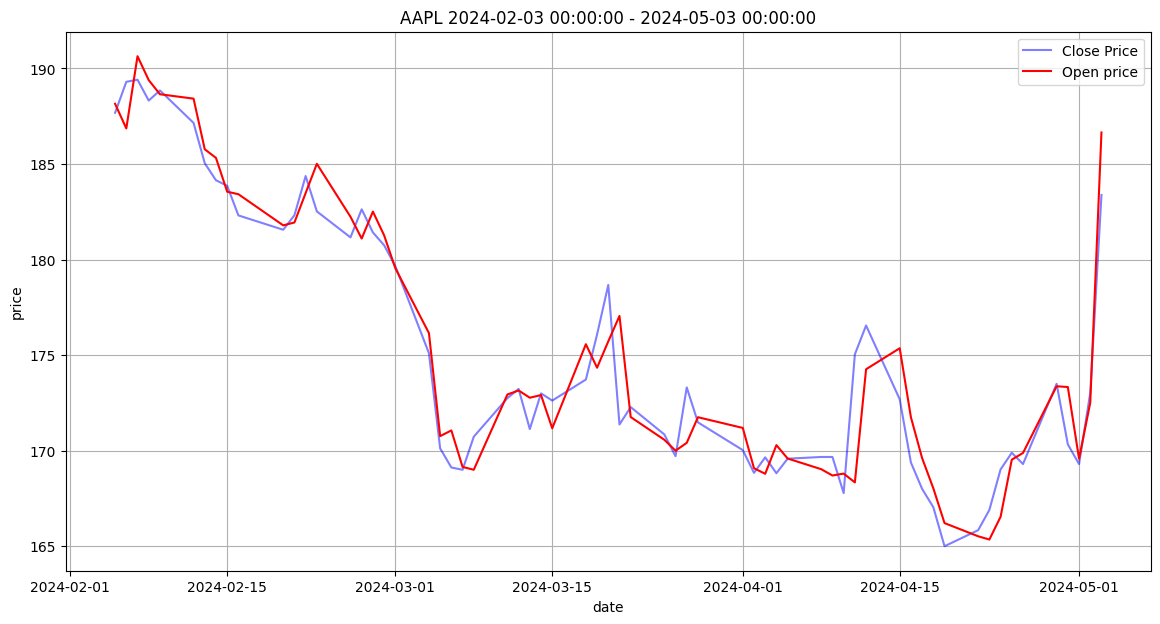

In [30]:
# Plot time series of open v. close stock price for Apple using the last 3 months of data
print(AAPL_Data.info())
AAPL_Data.reset_index(inplace=True)
three_month_range = AAPL_Data.loc[AAPL_Data['Date'] >=  three_months_ago].copy()

plt.figure(figsize=(14,7))
plt.plot(three_month_range['Date'], three_month_range['Close/Last'], label='Close Price', color='blue', alpha=0.5)
plt.plot(three_month_range['Date'], three_month_range['Open'], label='Open price', color='red')
plt.title(f'AAPL {three_months_ago} - {MAX_DATE}')
plt.xlabel('date')
plt.ylabel('price')
plt.legend()
plt.grid()
plt.show()



## EDA: Plotting a histogram of a stock's closing price in the last three months

One way to see how much a stock's price generally moves is to plot the frequency of closing prices over a set time period. 

Your task:
* Use the **last three months** of Apple stock data and plot a histogram of closing price

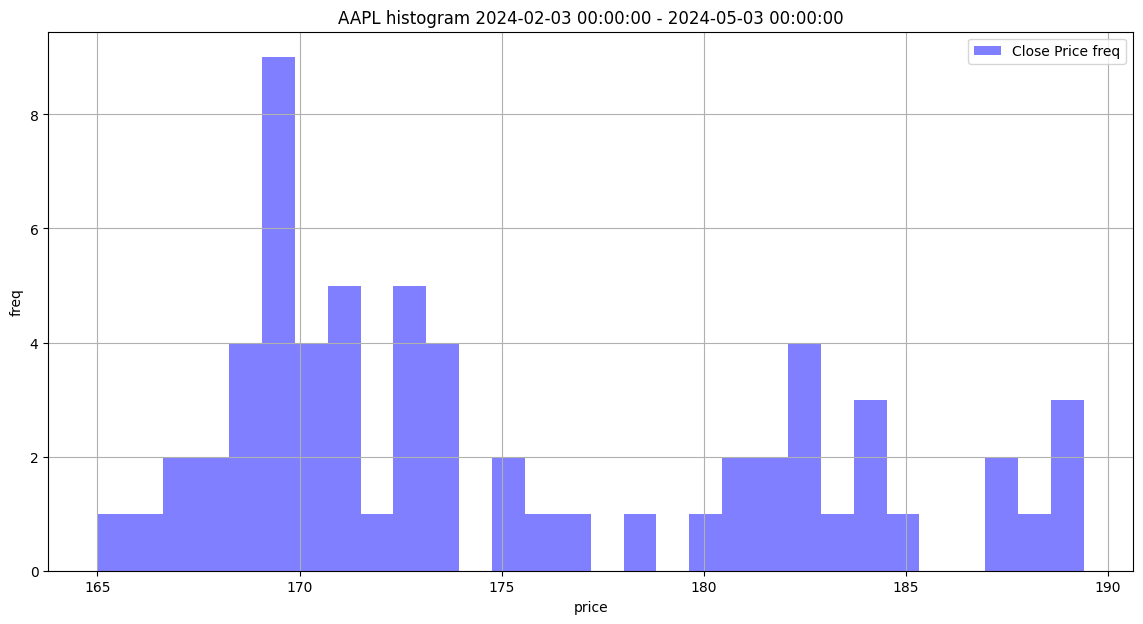

In [64]:
# Plot the histogram of Apple's closing price over the last 3 months 

plt.figure(figsize=(14,7))
plt.hist(three_month_range['Close/Last'], bins=30,label='Close Price freq', color='blue', alpha=0.5)
plt.title(f'AAPL histogram {three_months_ago} - {MAX_DATE}')
plt.xlabel('price')
plt.ylabel('freq')
plt.legend()
plt.grid()
plt.show()

## Calculating correlation between a stock price and a macroeconomic variable 

Inflation affects the purchasing power of money and can influence corporate profits, interest rates, and consumer behavior. By analyzing the correlation between stock prices and inflation, one can gauge how inflationary trends impact stock market performance. For instance, high inflation might erode profit margins and reduce stock prices, while moderate inflation might indicate a growing economy, benefiting stocks.

Your task:
* Plot a heatmap that shows the correlation between Microsoft and Apple returns and inflation 

This will require several steps:
1. Calculate the returns for Apple and Microsoft and the change in monthly inflation (use the `pct_change` method for each)
2. Interpolate the daily stock returns data to monthly so it can be compared to the monthly inflation data
3. Merge the stock returns (Apple and Microsoft) and inflation data series into a single dataframe
4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change
5. Plot the correlation matrix as a heatmap

### 1. Calculate returns for Microsoft / Apple and the monthly change in inflation

In [65]:
# Calculate daily returns for Apple and Microsoft and the percent change in inflation from month to month
AAPL_Data_Sort = AAPL_Data.sort_values(by='Date')
MS_Data_Sort = MS_Data.sort_values(by='Date')
AAPL_Data_Sort['Retrun'] = AAPL_Data_Sort['Close/Last'].pct_change()
MS_Data_Sort['Retrun'] = MS_Data_Sort['Close/Last'].pct_change()
print(AAPL_Data_Sort.head())

Inflation_M_Data['Inflation_Change'] = Inflation_M_Data['CORESTICKM159SFRBATL'].pct_change()
#Inflation_M_Data.drop(columns={'Change'},inplace=True);
Inflation_M_Data.head()

           Date  Close/Last     Volume   Open   High    Low    Retrun
2516 2014-05-06       21.23  373872650  21.49  21.59  21.23       NaN
2515 2014-05-07       21.15  282128727  21.26  21.33  20.99 -0.003768
2514 2014-05-08       21.00  228973884  21.01  21.23  20.94 -0.007092
2513 2014-05-09       20.91  291068564  20.88  20.94  20.73 -0.004286
2512 2014-05-12       21.17  212736019  20.98  21.20  20.98  0.012434


,CORESTICKM159SFRBATL,Inflation_Change
DATE,,
1968-01-31,3.651861,NaN
1968-02-29,3.673819,0.006013
1968-03-31,4.142164,0.127482
1968-04-30,4.155828,0.003299
1968-05-31,4.088245,-0.016262


### 2. Interpolate stock returns from daily to monthly

In [66]:
print(AAPL_Data_Sort)
AAPL_Data_Sort.set_index('Date', inplace=True)

AAPL_M_Data = AAPL_Data_Sort['Retrun'].resample('ME').agg(lambda x: (x + 1).prod() - 1).reset_index().rename(columns={'Retrun' : 'APPL_M_RETURN'}) 
#AAPL_M_Data = AAPL_Data['Retrun'].resample('ME').mean();

print(AAPL_M_Data.head())

MS_Data_Sort.set_index('Date', inplace=True)

MS_M_Data = MS_Data_Sort['Retrun'].resample('ME').agg(lambda x: (x + 1).prod() - 1).reset_index().rename(columns={'Retrun' : 'MS_M_RETURN'})  
print(MS_M_Data.head())


           Date  Close/Last     Volume    Open    High     Low    Retrun
2516 2014-05-06       21.23  373872650   21.49   21.59   21.23       NaN
2515 2014-05-07       21.15  282128727   21.26   21.33   20.99 -0.003768
2514 2014-05-08       21.00  228973884   21.01   21.23   20.94 -0.007092
2513 2014-05-09       20.91  291068564   20.88   20.94   20.73 -0.004286
2512 2014-05-12       21.17  212736019   20.98   21.20   20.98  0.012434
...         ...         ...        ...     ...     ...     ...       ...
4    2024-04-29      173.50   68169420  173.37  176.03  173.10  0.024808
3    2024-04-30      170.33   65934780  173.33  174.99  170.00 -0.018271
2    2024-05-01      169.30   50383150  169.58  172.71  169.11 -0.006047
1    2024-05-02      173.03   94214920  172.51  173.42  170.89  0.022032
0    2024-05-03      183.38  163224100  186.65  187.00  182.66  0.059816

[2517 rows x 7 columns]
        Date  APPL_M_RETURN
0 2014-05-31       0.065002
1 2014-06-30       0.027421
2 2014-07-31   

### 3. Merge the dataframes and calculate / plot the correlation

In [67]:
Monthly_retrun = pd.merge(AAPL_M_Data, MS_M_Data, on='Date', how='inner' )
print(Monthly_retrun.head())

Inflation_M_Data_Rename = Inflation_M_Data.reset_index().rename(columns={'DATE' : 'Date'})
#Inflation_M_Data_Rename = Inflation_M_Data_Rename.reset_index(drop=True)
#Inflation_M_Data_Rename = Inflation_M_Data.rename(columns={'DATE' : 'Date'})
print(Inflation_M_Data_Rename.head())
#Inflation_M_Data_Rename = Inflation_M_Data_Rename.drop(columns=['index'], inplace=True)
Monthly_retrun = pd.merge(Monthly_retrun, Inflation_M_Data_Rename, on='Date', how='inner' )

        Date  APPL_M_RETURN  MS_M_RETURN
0 2014-05-31       0.065002     0.048131
1 2014-06-30       0.027421     0.018564
2 2014-07-31       0.028842     0.035012
3 2014-08-31       0.072385     0.052595
4 2014-09-30      -0.017167     0.020471
        Date  CORESTICKM159SFRBATL  Inflation_Change
0 1968-01-31              3.651861               NaN
1 1968-02-29              3.673819          0.006013
2 1968-03-31              4.142164          0.127482
3 1968-04-30              4.155828          0.003299
4 1968-05-31              4.088245         -0.016262


### 4. Calculate the correlation matrix between the Apple returns, Microsoft returns, and inflation change

In [68]:
# Calculate correlation matrix
print(Monthly_retrun)
Monthly_retrun = Monthly_retrun.drop(columns=['Date','CORESTICKM159SFRBATL']);
correlation_matrix = Monthly_retrun.corr()

correlation_matrix.head()

          Date  APPL_M_RETURN  MS_M_RETURN  CORESTICKM159SFRBATL  \
0   2014-05-31       0.065002     0.048131              2.127518   
1   2014-06-30       0.027421     0.018564              2.142724   
2   2014-07-31       0.028842     0.035012              2.098319   
3   2014-08-31       0.072385     0.052595              1.959017   
4   2014-09-30      -0.017167     0.020471              1.950170   
..         ...            ...          ...                   ...   
114 2023-11-30       0.112315     0.120671              4.688293   
115 2023-12-31       0.013583    -0.007574              4.554396   
116 2024-01-31      -0.042227     0.057281              4.603922   
117 2024-02-29      -0.019794     0.040394              4.403102   
118 2024-03-31      -0.051286     0.017116              4.509212   

     Inflation_Change  
0            0.050251  
1            0.007147  
2           -0.020724  
3           -0.066387  
4           -0.004516  
..                ...  
114         -0.

,APPL_M_RETURN,MS_M_RETURN,Inflation_Change
APPL_M_RETURN,1.000000,0.588237,-0.074699
MS_M_RETURN,0.588237,1.000000,-0.070176
Inflation_Change,-0.074699,-0.070176,1.000000


### 5. Plot the correlation matrix as a heatmap 

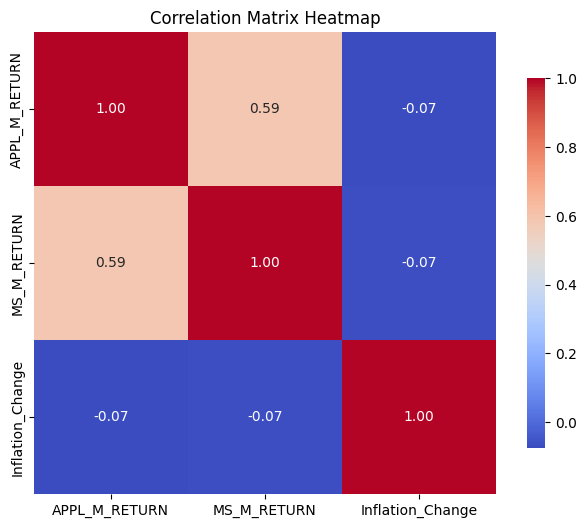

In [69]:
# Plot heatmap
# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Create a heatmap using seaborn
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, cbar_kws={"shrink": .8})

# Set the title
plt.title('Correlation Matrix Heatmap')

# Show the plot
plt.show()

## Calculating rolling volatility (standard deviation) of a stock's price for last 3 months

Volatility is a measure of the dispersion of returns for a given security. By calculating rolling volatility, investors can assess the risk associated with a stock over time: Higher volatility indicates higher risk, as the stock's price is more likely to experience significant fluctuations. In portfolio optimization, understanding the volatility of individual stocks and how it changes over time is crucial for diversification and optimization. By analyzing rolling volatility, investors can adjust their portfolios to maintain a desired risk level, potentially improving the risk-return profile.

One possible way to calculate volatility is by using the standard deviation of returns for a stock over time.

Your task:
* Calculate the weekly rolling standard deviation for Apple's closing price
* Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price. Plot these **on the same chart, but using different y-axes**

Helpful hints:
* You'll need to use the `pandas` `rolling()` method with a given `window_size` parameter to make it a _weekly_ rolling calculation
* Use **only the last three months of data**; data much older than this may not be as useful for portfolio optimization
* You'll need to create two axes on the matplotlib figure to be able to use two different y-axes (one for the closing price and one for the rolling volatility calculated here)

In [70]:
# Define the window size for the rolling calculation (e.g., one week)
rolling_window = 5

#three_month_range = three_month_range.iloc[::-1]
#three_month_range.reset_index
#three_month_range['Retrun'] = three_month_range['Close/Last'].pct_change();
print(AAPL_Data_Sort.head())

AAPL_Data_Sort['WV'] = AAPL_Data_Sort['Retrun'].rolling(window=rolling_window).std()
print(AAPL_Data_Sort.head())

            Close/Last     Volume   Open   High    Low    Retrun
Date                                                            
2014-05-06       21.23  373872650  21.49  21.59  21.23       NaN
2014-05-07       21.15  282128727  21.26  21.33  20.99 -0.003768
2014-05-08       21.00  228973884  21.01  21.23  20.94 -0.007092
2014-05-09       20.91  291068564  20.88  20.94  20.73 -0.004286
2014-05-12       21.17  212736019  20.98  21.20  20.98  0.012434
            Close/Last     Volume   Open   High    Low    Retrun  WV
Date                                                                
2014-05-06       21.23  373872650  21.49  21.59  21.23       NaN NaN
2014-05-07       21.15  282128727  21.26  21.33  20.99 -0.003768 NaN
2014-05-08       21.00  228973884  21.01  21.23  20.94 -0.007092 NaN
2014-05-09       20.91  291068564  20.88  20.94  20.73 -0.004286 NaN
2014-05-12       21.17  212736019  20.98  21.20  20.98  0.012434 NaN


In [73]:
# Calculate rolling one-week volatility
AAPL_Data_Sort = AAPL_Data.reset_index()
print(AAPL_Data_Sort)
three_month_range_mv = AAPL_Data_Sort.loc[AAPL_Data_Sort['Date'] >=  three_months_ago].copy()
print(three_month_range_mv.head())
print(three_month_range_mv.tail())

      index       Date  Close/Last     Volume    Open    High     Low
0         0 2024-05-03      183.38  163224100  186.65  187.00  182.66
1         1 2024-05-02      173.03   94214920  172.51  173.42  170.89
2         2 2024-05-01      169.30   50383150  169.58  172.71  169.11
3         3 2024-04-30      170.33   65934780  173.33  174.99  170.00
4         4 2024-04-29      173.50   68169420  173.37  176.03  173.10
...     ...        ...         ...        ...     ...     ...     ...
2512   2512 2014-05-12       21.17  212736019   20.98   21.20   20.98
2513   2513 2014-05-09       20.91  291068564   20.88   20.94   20.73
2514   2514 2014-05-08       21.00  228973884   21.01   21.23   20.94
2515   2515 2014-05-07       21.15  282128727   21.26   21.33   20.99
2516   2516 2014-05-06       21.23  373872650   21.49   21.59   21.23

[2517 rows x 7 columns]
   index       Date  Close/Last     Volume    Open    High     Low
0      0 2024-05-03      183.38  163224100  186.65  187.00  182.66
1

KeyError: 'WV'

<Figure size 2000x700 with 0 Axes>

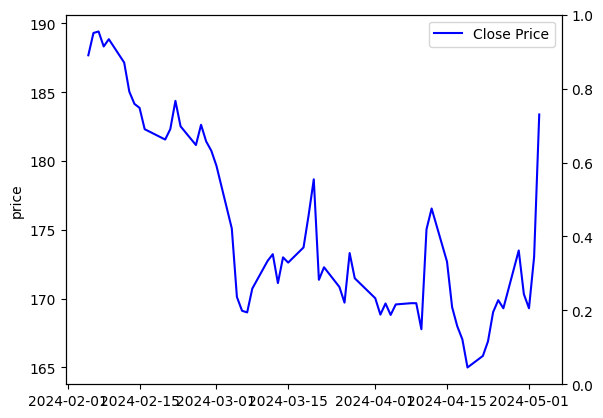

In [72]:
# Plot the calculated rolling weekly volatility of Apple's closing price against Apple's closing price
# Plot these on the same chart, but using different y-axes
plt.figure(figsize=(20,7))
fig, ax1 = plt.subplots()
ax1.plot(three_month_range_mv['Date'], three_month_range_mv['Close/Last'], label='Close Price', color='blue')
ax1.set_ylabel('price')
ax1.legend()
ax2 = ax1.twinx()
ax2.plot(three_month_range_mv['Date'], three_month_range_mv['WV'], label='rolling weekly volatility', color='red')
ax2.set_ylabel('rolling weekly volatility')
ax2.legend()
plt.title(f'AAPL {three_months_ago} - {MAX_DATE}')
plt.xlabel('date')


plt.grid()
plt.show()






## Export data

Now that you have preprocessed your data, you should save it in new csv files so that it can be used in downstream tasks without having to redo all the preprocessing steps. 

Your task:
* Use `pandas` to export all modified datasets back to new CSV files

In [ ]:
#writer = pd.ExcelWriter('',engine='xlsxwriter')
pd.DataFrame(three_month_range).to_csv('three_month_range.csv')
correlation_matrix.to_csv('correlation_matrix.csv')
AAPL_Data.to_csv('AAPL_Data.csv')
AAPL_M_Data.to_csv('AAPL_M_Data.csv')
MS_Data.to_csv('MS_Data.csv')
MS_M_Data.to_csv( 'MS_M_Data.csv')
Inflation_M_Data.to_csv( 'Inflation_M_Data.csv')
Inflation_Q_Data.to_csv( 'Inflation_Q_Data.csv')
Inflation_W_Data.to_csv( 'Inflation_W_Data.csv')